## Bike Sharing 

In [104]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

### Step 1 : reading and Understanding the Data

In [106]:
# Reading Dataset

bike = pd.read_csv("D:/day.csv")
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [107]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [108]:
# Let's see how many rows and columns we have

bike.shape

(730, 16)

In [109]:
#Let's get some information on the dataset

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [110]:
# Let's see some summary

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Missing Values

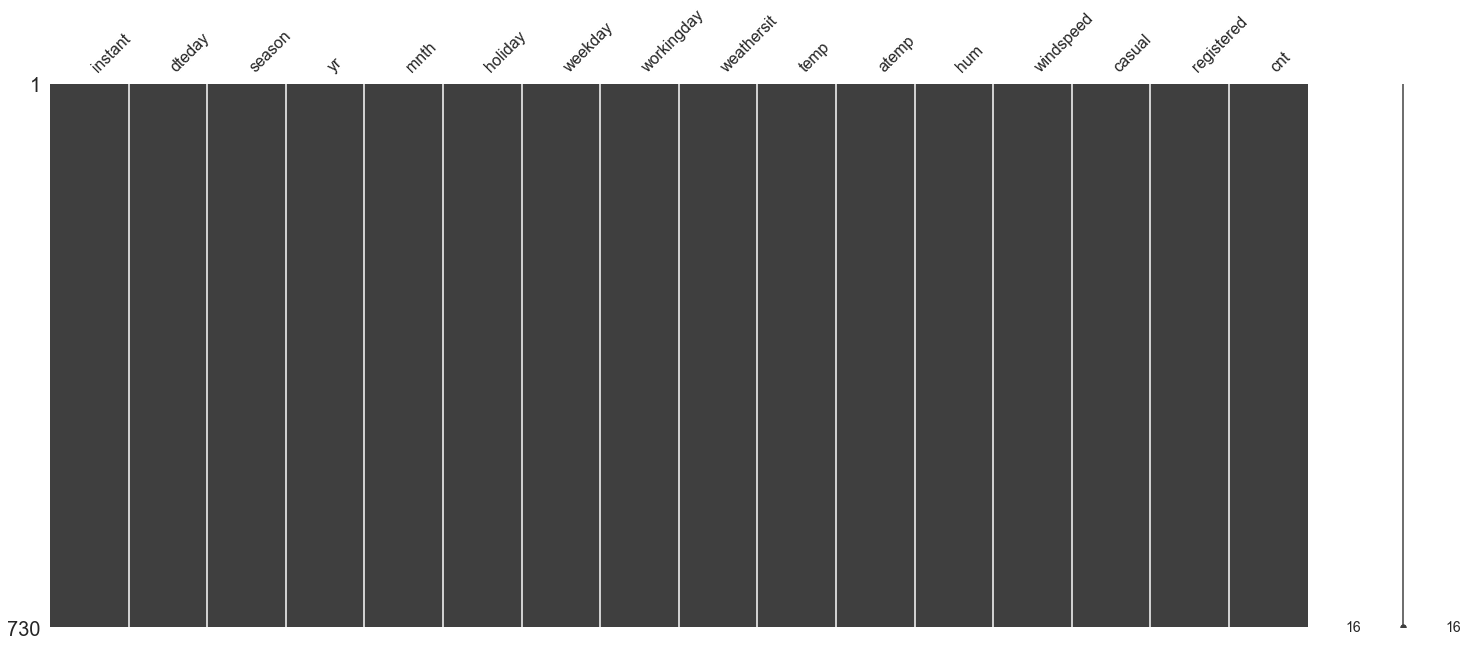

In [111]:
# To check if there are any missing values in the dataset

import missingno as mn
mn.matrix(bike)

In [112]:
bike['dteday'].dtype

dtype('O')

Let's convert the datatype of dteday column to datetime.

In [113]:
bike['dteday'] =  pd.to_datetime(bike['dteday'],format='%d-%m-%Y')
bike['dteday'].dtype

dtype('<M8[ns]')

Extracting the Year and Month from the Date

In [114]:
bike['year'] = pd.DatetimeIndex(bike['dteday']).year
bike['month'] = pd.DatetimeIndex(bike['dteday']).month

In [115]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [116]:
# Dropping the columns as we have extracte#d the correct year and month from the date.

bike.drop(['yr','mnth'],axis=1,inplace=True)

In [117]:
bike.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [118]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.

bike.drop('holiday',axis=1,inplace=True)

In [119]:
# Dropping the dteday,instant,casual and registered columns.

bike.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [120]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [121]:
# Renaming some columns for better understanding

bike.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [122]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


###  Step 2 Encoding the Labels and Visualization



#### 1) Season
      1:Spring
      2:Summer
      3:Fall
      4:Winter

In [123]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike['season'] = bike['season'].map(codes)

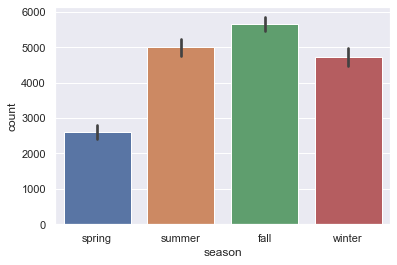

In [124]:
sns.barplot('season','count',data=bike)

Bike Rentals are more during Fall(Monsoon) season.

#### 2) Weathersit
      1: Clear, Few clouds, Partly cloudy, Partly cloudy
      2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      3: Light Snow, Light Rain+Thunderstorm+Scattered clouds,Light Rain+Scattered clouds
      4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [125]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike['weathersit'] = bike['weathersit'].map(codes)

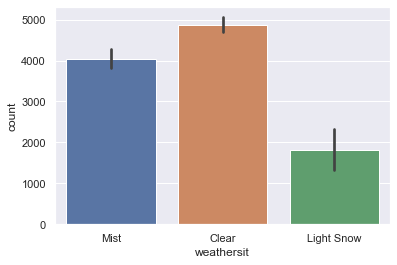

In [126]:
sns.barplot('weathersit','count',data=bike)

Bikes seem to be rented more in Partly cloudy weather.

#### 3) Workingday
if day is neither weekend nor holiday is 1,
otherwise is 0

In [127]:
codes = {1:'working_day',0:'Holiday'}
bike['workingday'] = bike['workingday'].map(codes)


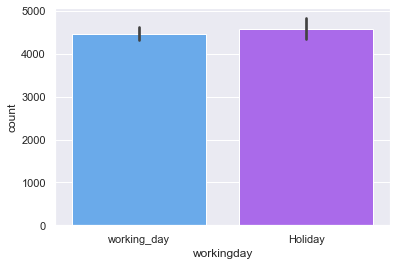

In [128]:
sns.barplot('workingday','count',data=bike,palette='cool')

Bikes seems to be rented more on working_day.

#### 4) Year
     2018:0
     2019:1

In [129]:
codes = {2019:1,2018:0}
bike['year'] = bike['year'].map(codes)

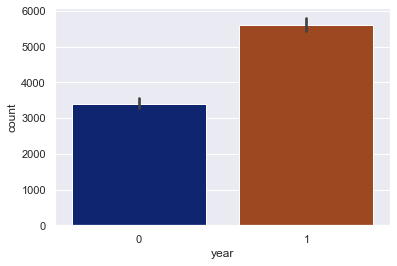

In [130]:
sns.barplot('year','count',data=bike,palette='dark')

Bike rental popularity increased in 2019 compared to 2018

#### 5) Month
    1:Jan     
    2:Feb
    3:Mar
    4:Apr
    5:May
    6:June
    7:July
    8:Aug
    9:Sep
    10:Oct
    11:Nov
    12:Dec

In [131]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['month'] = bike['month'].map(codes)


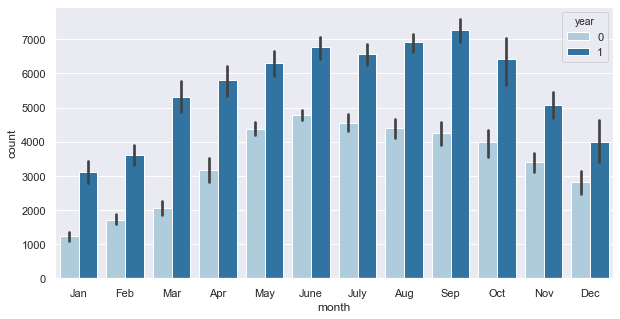

In [132]:
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bike,palette='Paired')

#### 6) WeekDay:
    0:Mon
    1:Tue
    2:Wed
    3:Thu
    4:Fri
    5:Sat
    6:Sun

In [133]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike['weekday'] = bike['weekday'].map(codes)

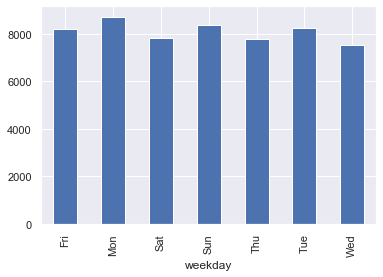

In [134]:
bike.groupby('weekday')['count'].max().plot(kind='bar')

Bike Rentals are maximum on Sunday and Monday


#### 7.) Temp

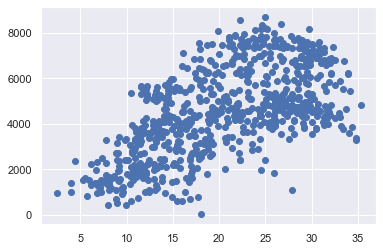

In [135]:
plt.scatter('temp','count',data=bike)

Bike Rentals are observed at higher temperatures.

#### 8) atemp

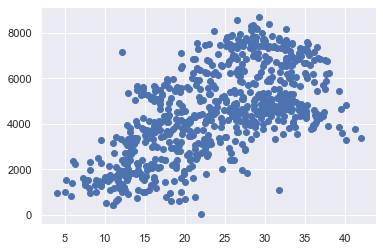

In [136]:
plt.scatter('atemp','count',data=bike)

Bike Rentals are observed at higher "feel-like" temperatures.

#### 9) Humidity

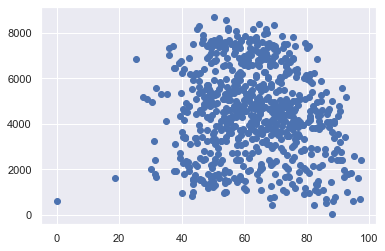

In [137]:
plt.scatter('humidity','count',data=bike)

Temperature being directly proportional to Humidity, Bike Rentals are making during high humidity

#### 10) Windspeed

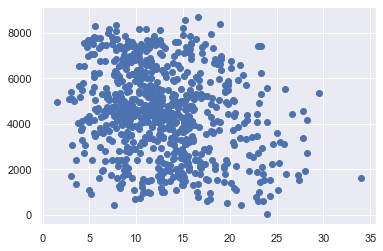

In [138]:
plt.scatter('windspeed','count',data=bike)

Wind speeds increase with a greater temperature difference.Wind speed near the surface is most highly correlated with the temperature.

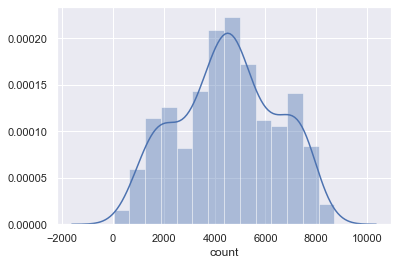

In [139]:
sns.distplot(bike['count'])

### Step 3: Visualizing the Relationship among Variables

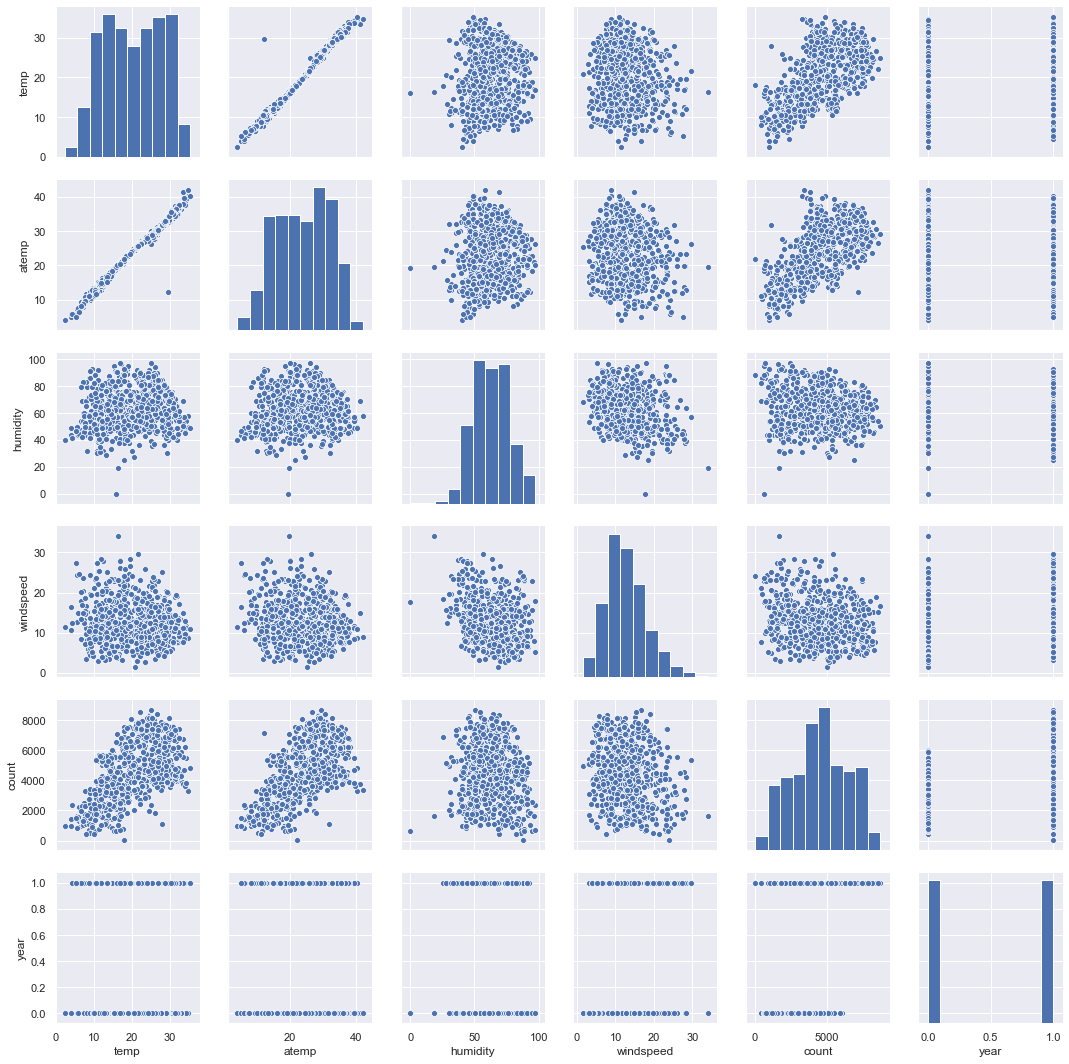

In [140]:
sns.pairplot(bike)

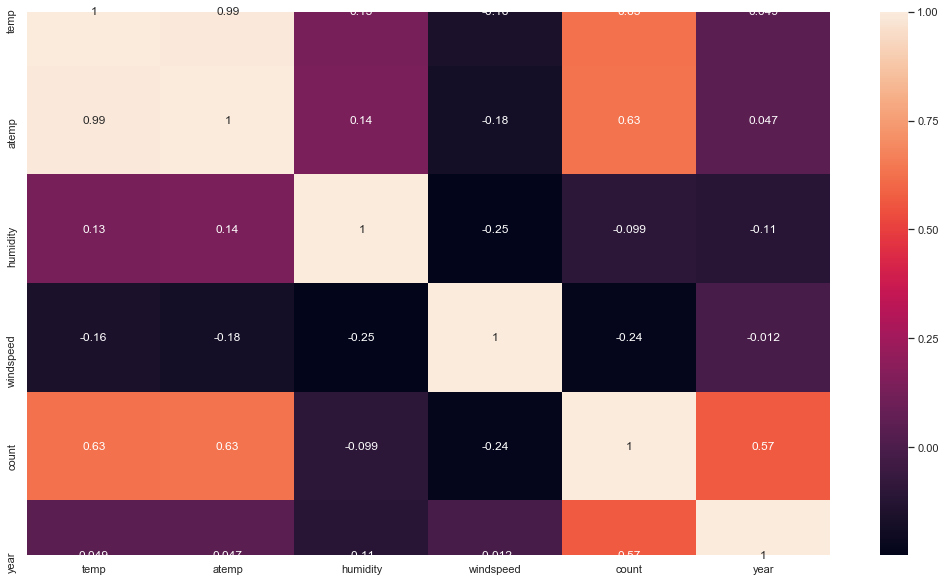

In [141]:
plt.figure(figsize = (18,10))
sns.heatmap(bike.corr(),annot=True)

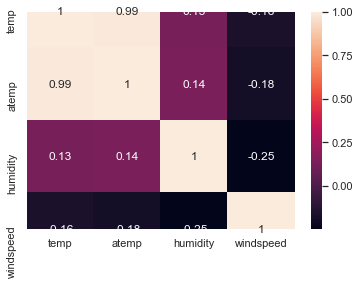

In [142]:
data= bike[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)

It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity

In [143]:
bike.drop('atemp',axis=1,inplace=True)

In [144]:
bike.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


### Step 4: Dealing with Categorical Variables

In [145]:
seasons = pd.get_dummies(bike['season'],drop_first=True)

working_day = pd.get_dummies(bike['workingday'],drop_first=True)

weather= pd.get_dummies(bike['weathersit'],drop_first=True)

month= pd.get_dummies(bike['month'],drop_first=True)

week_day= pd.get_dummies(bike['weekday'],drop_first=True)

In [146]:
bike= pd.concat([bike,seasons,working_day,weather,month,week_day],axis=1)

In [147]:
bike.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,1,0,0,0,0


In [148]:
# Dropping the categorical variables as they are already dummy-encoded.

bike.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [149]:
bike.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Step 5: Splitting the Data into Training and Testing Sets

In [150]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)


Rescaling the Features

In [151]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [152]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

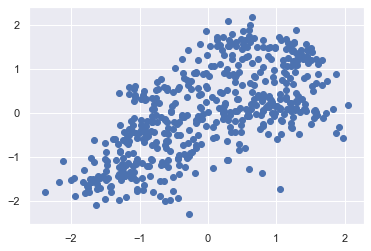

In [153]:
plt.scatter('temp','count',data=df_train)

Dividing into X and Y sets for the model building

In [154]:
y_train = df_train.pop('count')
X_train = df_train

### Step 6: Building a linear model

Using Recursive feature elimination(RFE) for automated Feature Selection approach

In [155]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [156]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [157]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11)]

In [158]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [159]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [160]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [161]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [162]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.16e-176
Time:                        22:33:22   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5893      0.136     -4.340      0.000      -0.856      -0.323
temp            0.4029      0.027     14.765      0.000       0.349       0.457
year            1.0473      0.039     27.009      0.000       0.971       1.123
spring         -0.6760      0.057    -11.825      0.000      -0.788      -0.564
working_day     0.3710      0.134      2.777      0.006       0.109       0.633
Light Snow     -1.2971      0.116    -11.212      0.000      -1.524      -1.070
Mist           -0.3619      0.041     -8.739      0.000      -0.443      -0.281
July           -0.3136      0.082     -3.834      0.000      -0.474      -0.153
Sep             0.2874      0.074      3.884      0.000       0.142       0.433
Mon             0.4613      0.142      3.259      0.001       0.183       0.739
Sun             0.4451      0.142      3.131      0.002       0.166       0.724
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.927
Skew:                          -0.645   Prob(JB):                     1.37e-29
Kurtosis:                       5.143   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping Mon

In [163]:
X_train1= X_train_rfe.drop('Mon',1)

In [164]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [165]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     239.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.73e-175
Time:                        22:33:31   Log-Likelihood:                -297.49
No. Observations:                 510   AIC:                             615.0
Df Residuals:                     500   BIC:                             657.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1902      0.059     -3.212      0.001      -0.307      -0.074
temp            0.4042      0.028     14.673      0.000       0.350       0.458
year            1.0463      0.039     26.730      0.000       0.969       1.123
spring         -0.6842      0.058    -11.865      0.000      -0.797      -0.571
working_day    -0.0278      0.054     -0.514      0.607      -0.134       0.078
Light Snow     -1.2901      0.117    -11.047      0.000      -1.519      -1.061
Mist           -0.3544      0.042     -8.490      0.000      -0.436      -0.272
July           -0.3052      0.083     -3.698      0.000      -0.467      -0.143
Sep             0.2731      0.075      3.662      0.000       0.127       0.420
Sun             0.0459      0.073      0.630      0.529      -0.097       0.189
==============================================================================
Omnibus:                       60.871   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.020
Skew:                          -0.641   Prob(JB):                     3.94e-31
Kurtosis:                       5.224   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now we have all the variables with p-value less than 0.05.

In [166]:
X_train_new= X_train2.drop('const',axis=1)

#### Variance Inflation Factor(VIF)

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.14
0,temp,2.01
2,spring,2.00
1,year,1.81
5,Mist,1.44
6,July,1.35
8,Sun,1.24
7,Sep,1.16
4,Light Snow,1.06


All the variables have VIF less than 5 and it's perfect!

### Step 7: Residual Analysis of the train data


In [168]:
y_train_pred = lm1.predict(X_train2)

Text(0.5, 0, 'Errors')

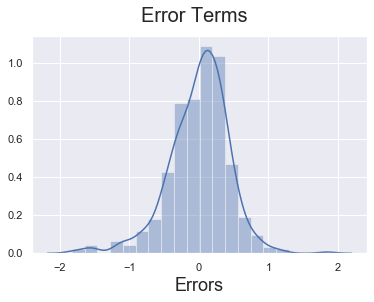

In [169]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Step 8: Making Predictions

In [170]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])


Dividing into X_test and y_test

In [171]:
y_test = df_test.pop('count')
X_test = df_test

In [172]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [173]:
# Making predictions
y_test_pred = lm1.predict(X_test_new)

### Step 9: Model Evaluation

Text(0, 0.5, 'Predictions')

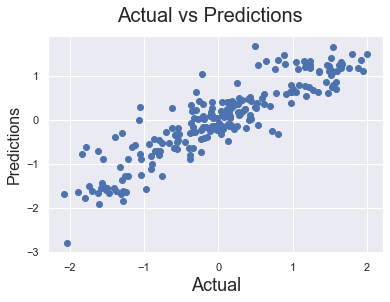

In [174]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)                          # Y-label

In [175]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8035305530955212

#### Conclusion:
    The top 5variables that are seen effecting and benefitting the Bike Rental count are as follows:

    Spring season : -0.6842
    Temperature : 0.3999
    Mist : -0.3647
    Sun : 0.2749
    working_day : 0.2327

#### Assumptions of Linear Regression:

    The error terms are normally distributed.
    The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
    The predicted values have linear relationship with the actual values.**

********************************************************************************************************

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------